## DATA 620

### Project 1

For your first project, you are asked to
- 1.Identify and load a network dataset that has some categorical information available for each node.
- 2.For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
- 3.Compare your centrality measures across your categorical groups.

I thought it would be interesting to study and analyze the network data of subway map in which each nodes represents a each station/stops and each edges represents the route between them. I found vienna subway network data from https://digitales.wien.gv.at/open-data/ and stored them in github. Each node is represented by the station in 'start' and 'stop' and 'line' is indicates train line for each nodes.


In [21]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [22]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/jihokim97/CUNY-SPS-DATA-620/main/project%201/Vienna%20subway.csv', sep = ';')
df.head()

,Start,Stop,Line,Color
0,Oberlaa,Neulaa,1,red
1,Neulaa,Alaudagasse,1,red
2,Alaudagasse,Altes Landgut,1,red
3,Altes Landgut,Troststrasse,1,red
4,Troststrasse,Reumannplatz,1,red


First we load the dataset then create a graph using the Networkx and produce some information about the graph. The graph has 98 nodes or stations and 104 edges or routes between them.

In [40]:
stations = pd.unique(df[['Start', 'Stop']].values.flatten())
stations = sorted(stations)
station2id = {s:i for i, s in enumerate(stations)}
id2station = dict(enumerate(stations))

G = nx.Graph()

for station_name, id in station2id.items():
    G.add_node(id, name=station_name)
for i, series in df.iterrows():
    u = station2id[series['Start']]
    v = station2id[series['Stop']]
    line = series['Line']
    color = series['Color']
    G.add_edge(u, v, line=line, color=color)
print(nx.info(G))

Graph with 98 nodes and 104 edges


Next I visualize the graph by creating source nodes, directed nodes and edges between them


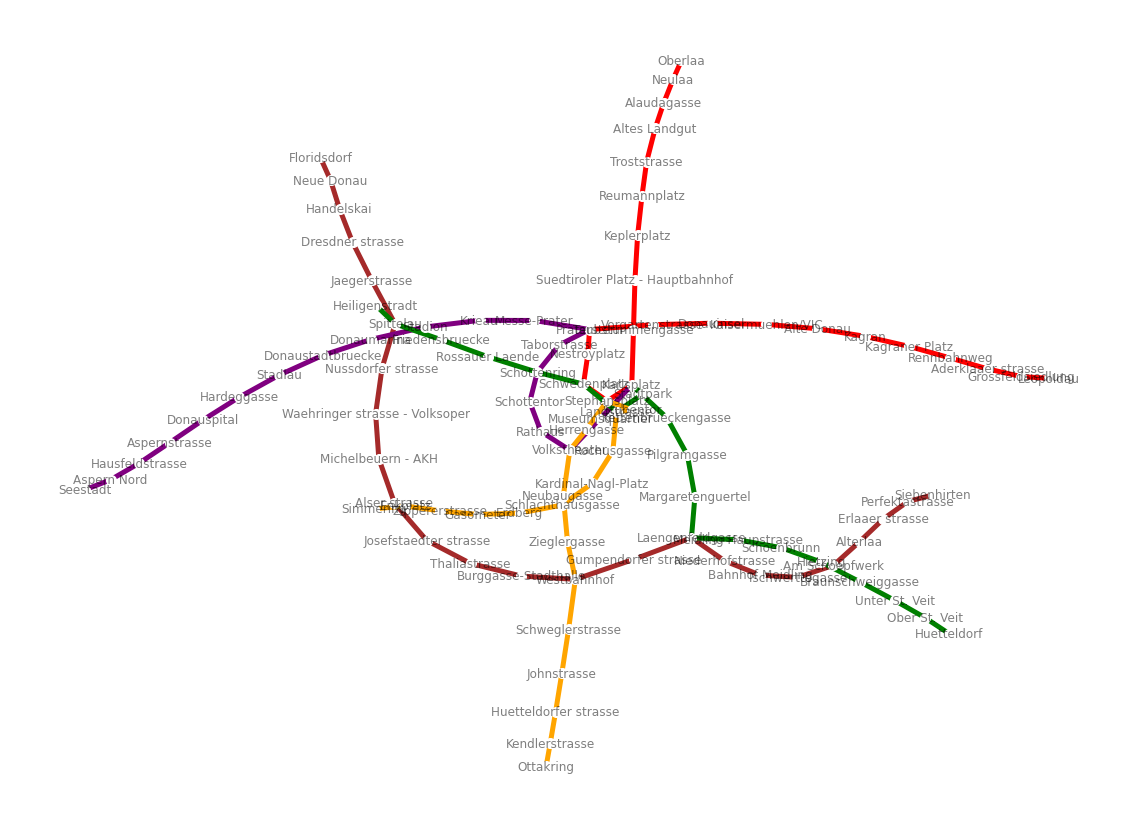

In [41]:
plt.figure(figsize=(20,15))

# calculate posisions in which the nodes are to be placed.
pos = nx.spring_layout(G, k=0.05, seed=2020)

# draw edges
unique_colors = pd.unique(list(nx.get_edge_attributes(G, 'color').values()))
for color in unique_colors:
    edgelist = [e for e, c in nx.get_edge_attributes(G, 'color').items() if c == color]
    nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color=color, width=5)

# draw nodes
nx.draw_networkx_labels(G, pos, id2station, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=100)

plt.axis("off")
plt.show()


In [50]:
# Calculate centrality and Eigenvector 

centrality = pd.DataFrame({
    "Degree Centrality" : list(nx.degree_centrality(G).values()),
    "Eigenvector Centrality" : list(nx.eigenvector_centrality(G).values())
}, index = list(G)).sort_values(by = ["Degree Centrality", "Eigenvector Centrality"], ascending = False)

centrality.head(5)

,Degree Centrality,Eigenvector Centrality
40,0.051546,0.368212
83,0.041237,0.397593
74,0.041237,0.380823
46,0.041237,0.329666
72,0.041237,0.237887


In [51]:
max(centrality['Degree Centrality'])

0.05154639175257732

In [52]:
max(centrality['Eigenvector Centrality'])

0.397593407947549

I had difficulties on how to find centrality measures over different categorical groups. 